# Image classification with Tensorflow

## Load data 

In [11]:
from tensorflow.keras.datasets import fashion_mnist, cifar10
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
np.unique(y_train.reshape(-1))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

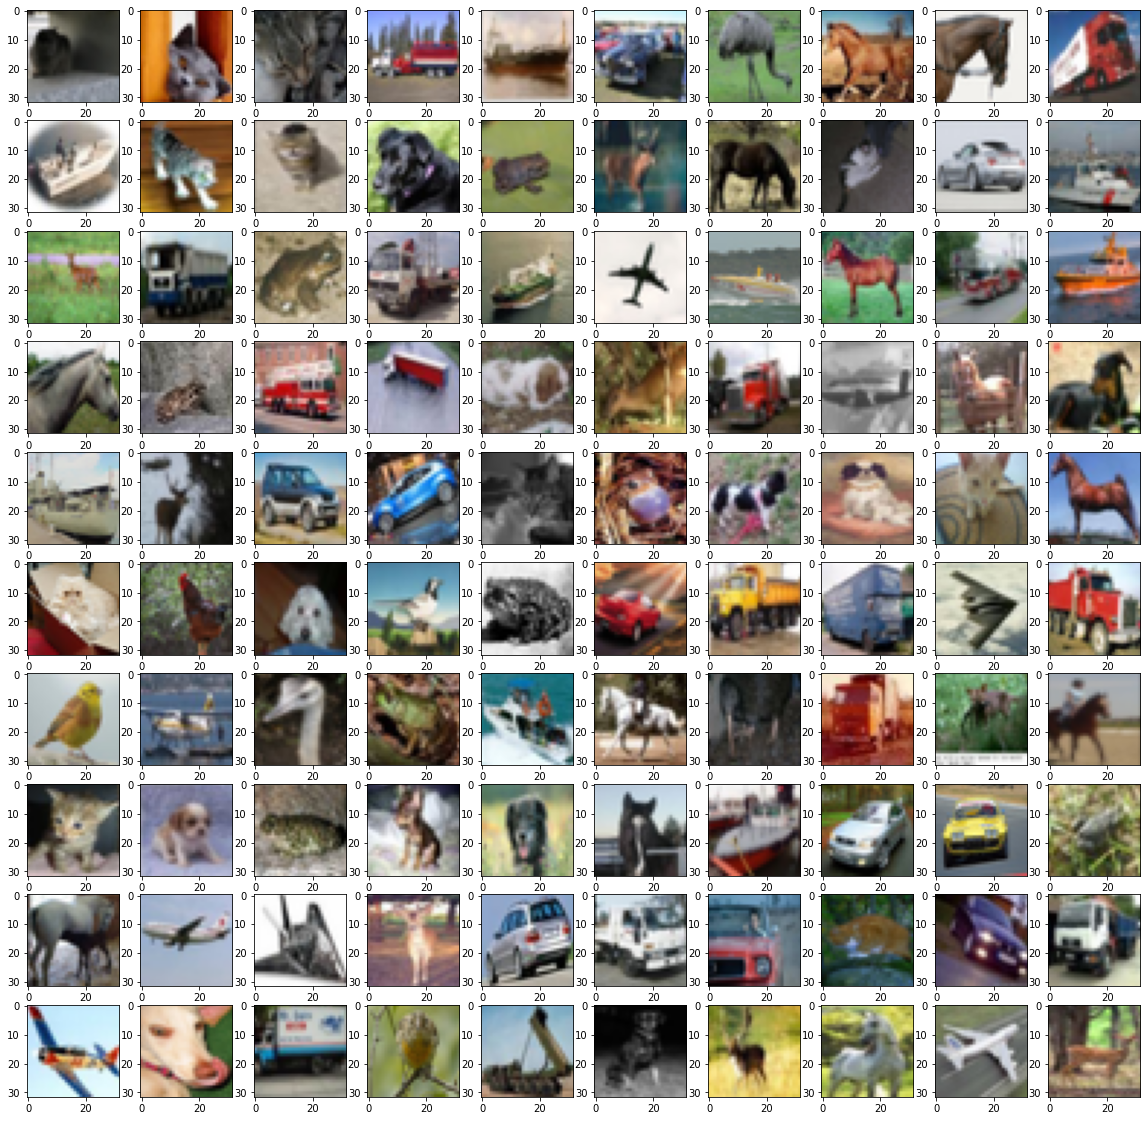

In [16]:
#show 10*10 random train images
import random
sample = random.sample(list(X_train), 100)
fig, axs = plt.subplots(10,10, figsize = (20,20))
k = 0
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(sample[k], cmap = plt.cm.binary)
        k+=1

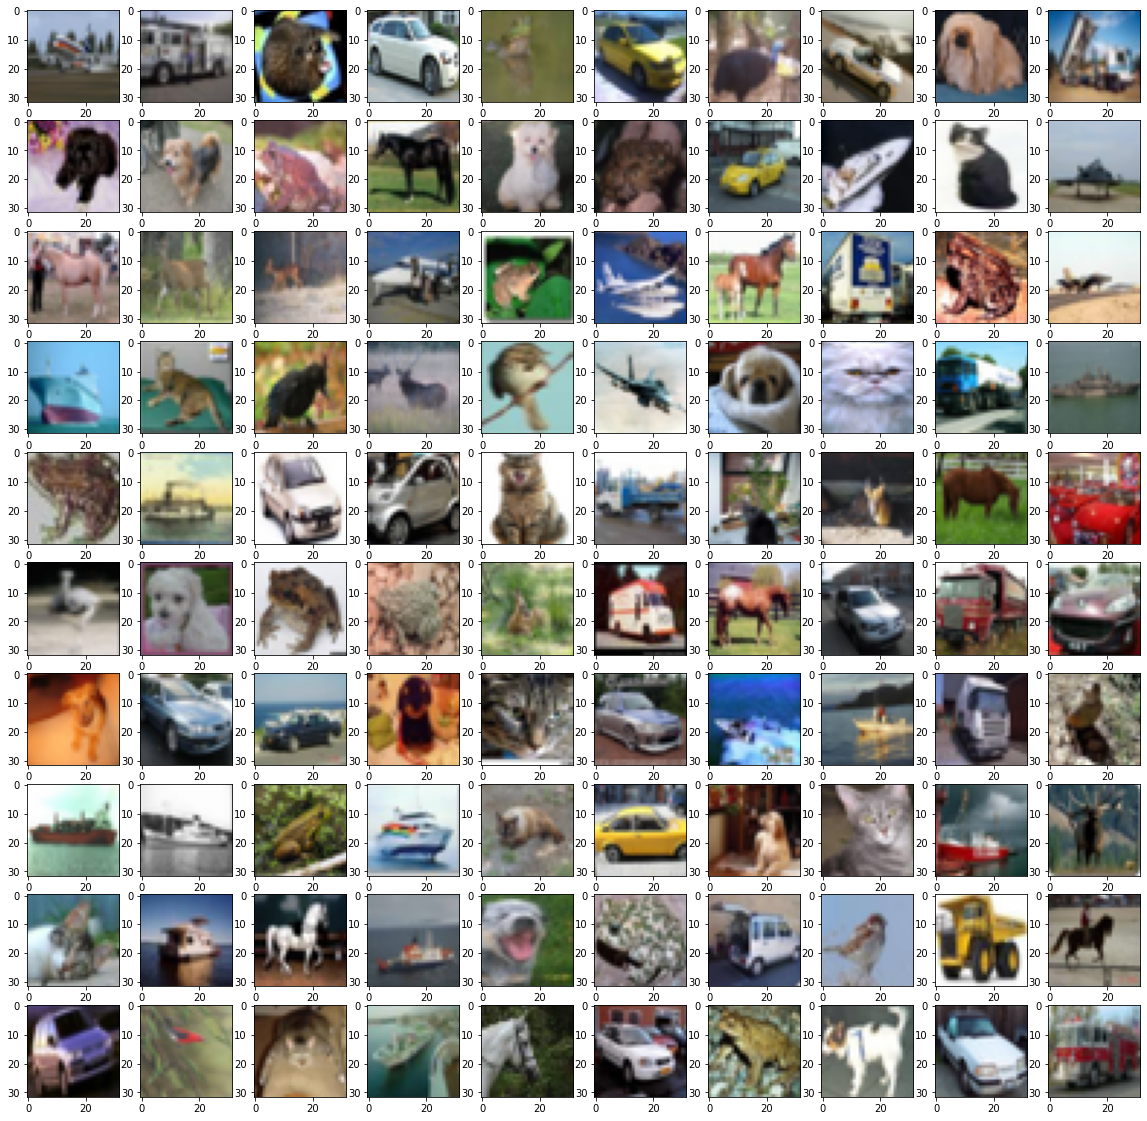

In [17]:
#show 10*10 random test images
import random
sample = random.sample(list(X_test), 100)
fig, axs = plt.subplots(10,10, figsize = (20,20))
k = 0
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(sample[k], cmap = plt.cm.binary)
        k+=1

## DNN Model : 

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [19]:
DNN = Sequential()
DNN.add(layers.Flatten(input_shape=(32, 32, 3) ))
DNN.add(layers.Dense(128, activation = 'relu' ))
DNN.add(layers.Dense(10, activation = 'softmax'))

DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = Adam(lr=0.002)
loss   = SparseCategoricalCrossentropy(from_logits = True)
metric = SparseCategoricalAccuracy()
DNN.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [21]:
#transform data, scale between 0 and 1 :
X_train = X_train / 255
X_test = X_test / 255

In [22]:
DNN.fit(X_train, y_train, epochs = 10, batch_size = 32, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 19s 4ms/step - loss: 2.1338 - sparse_categorical_accuracy: 0.2430
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8274 - sparse_categorical_accuracy: 0.3390
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8006 - sparse_categorical_accuracy: 0.3481
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7814 - sparse_categorical_accuracy: 0.3588
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7598 - sparse_categorical_accuracy: 0.3682
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7474 - sparse_categorical_accuracy: 0.3701
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7528 - sparse_categorical_accuracy: 0.3699
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7528 - sparse_categorical_accuracy: 0.3725
Epoch 9/10
1563/1563 [=========

In [23]:
loss, accuracy = DNN.evaluate(X_test, y_test)
print('test accuracy : {:.2f}%'.format(accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.7307 - sparse_categorical_accuracy: 0.3780
test accuracy : 37.80%


## Extracting features with convolution and pooling kernels and Relu activation function

In [24]:
from helper import *

In [25]:
image = plt.imread('stinkbug.png')
image.shape

(375, 500, 3)

In [26]:
image = image[:,:,1]

In [27]:
imFilter = np.array([[0,0,0],[1,0,-1],[0,0,0]])
imFilter

array([[ 0,  0,  0],
       [ 1,  0, -1],
       [ 0,  0,  0]])

In [28]:
#imFilter = np.array([[0,1,0],[0,-1,0],[0,-1,0]])
#imFilter

In [29]:
imgC = convolutionKernal(imFilter,image,0,1)
imgR = relu(imgC)
imgP = maxPooling(imgR,5,5)

### Original image

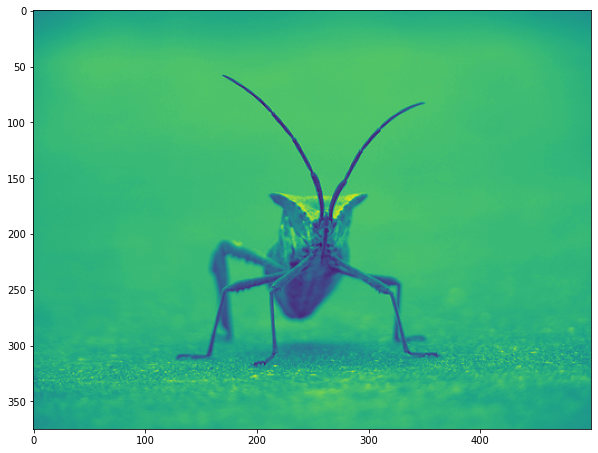

In [30]:
plt.figure(figsize=[10,10])
plt.imshow(image)

## Feature extractions 

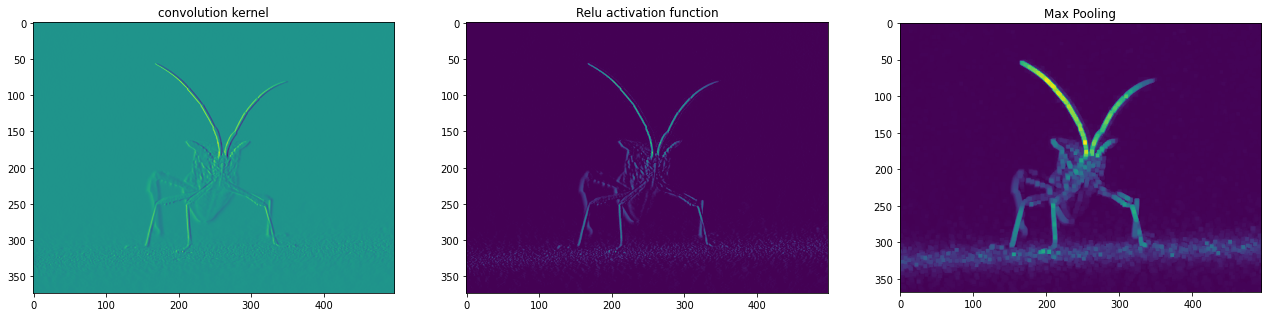

In [31]:
#plt.figure(figsize=[10,10])
fig, axs = plt.subplots(1, 3, figsize=(22,20))

axs[0].imshow(imgC)
axs[0].set_title('convolution kernel')

axs[1].imshow(imgR)
axs[1].set_title('Relu activation function')

axs[2].imshow(imgP)
axs[2].set_title('Max Pooling')

plt.show()

## CNN Model :

In [32]:
X_train.shape

(50000, 32, 32, 3)

In [33]:
y_train.shape

(50000, 1)

In [34]:
CNN = Sequential()
CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)) )
CNN.add(layers.MaxPooling2D((2, 2)) )
CNN.add(layers.Flatten() )
CNN.add(layers.Dense(128, activation = 'relu' ))
CNN.add(layers.Dense(10, activation = 'softmax'))

CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
_________________________________________________________________


In [35]:
optimizer = Adam(lr=0.002)
loss   = SparseCategoricalCrossentropy(from_logits = True)
metric = SparseCategoricalAccuracy()
CNN.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [36]:
CNN.fit(X_train, y_train, epochs = 10, batch_size = 32, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 73s 6ms/step - loss: 1.5724 - sparse_categorical_accuracy: 0.4352
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1093 - sparse_categorical_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.9493 - sparse_categorical_accuracy: 0.664 - 8s 5ms/step - loss: 0.9494 - sparse_categorical_accuracy: 0.6643
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.8345 - sparse_categorical_accuracy: 0.702 - 8s 5ms/step - loss: 0.8346 - sparse_categorical_accuracy: 0.7020
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7508 - sparse_categorical_accuracy: 0.7371
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6596 - sparse_categorical_accuracy: 0.7652
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.7994
Epoch 8/10
1563/1563 [======

In [37]:
loss, accuracy = CNN.evaluate(X_test, y_test)
print('test accuracy : {:.2f}%'.format(accuracy*100))

313/313 [==============================] - 16s 4ms/step - loss: 1.5169 - sparse_categorical_accuracy: 0.6161
test accuracy : 61.61%


## Layers Visualisation

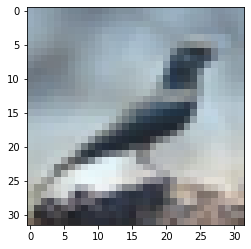

In [92]:
n = 1254
plt.imshow(X_test[n])
plt.show()

In [93]:
CNN.layers

In [94]:
conv_relu_out = CNN.layers[0](X_test[n].reshape(1,32,32,3))
maxpool_out   = CNN.layers[1](conv_relu_out)

In [95]:
conv_relu_out = conv_relu_out.numpy().reshape(30,30,-1)
conv_relu_out.shape

(30, 30, 32)

In [96]:
maxpool_out = maxpool_out.numpy().reshape(15,15,-1)
maxpool_out.shape

(15, 15, 32)

#### Convolution Kernals

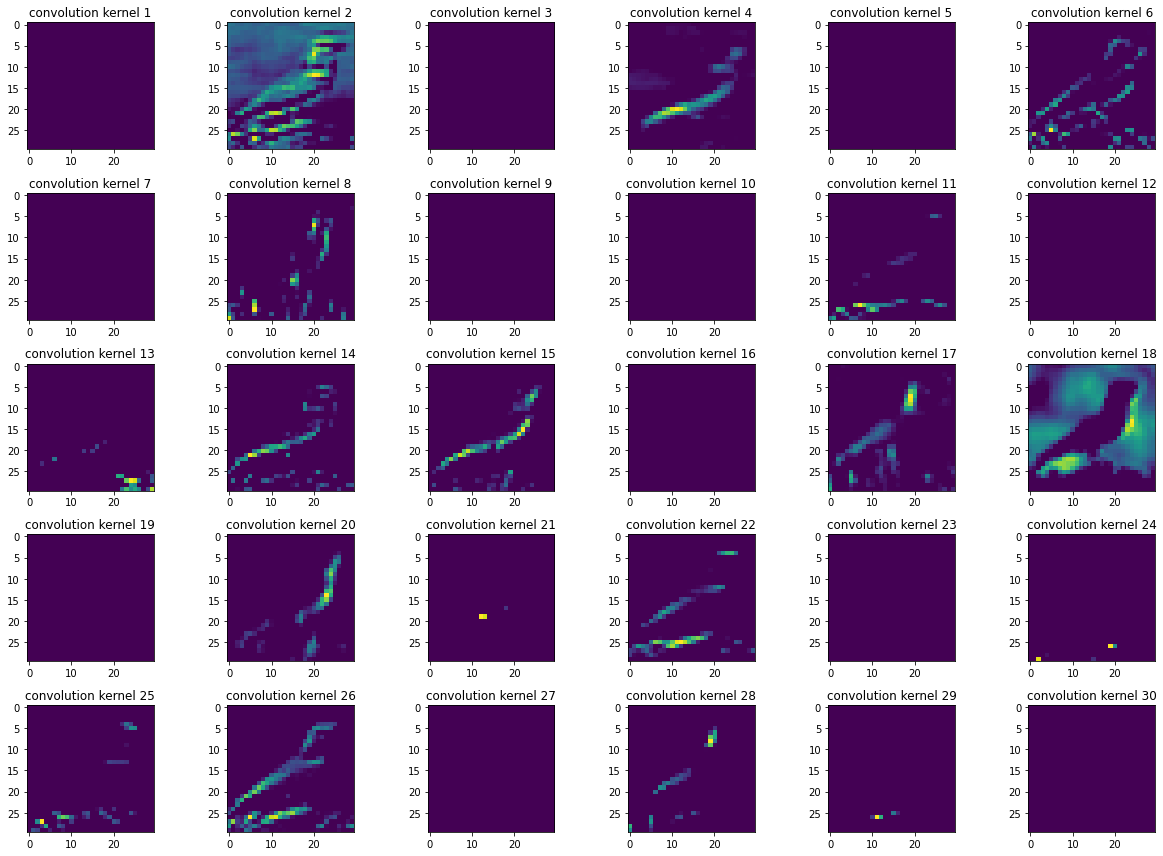

In [97]:
fig, axs = plt.subplots(5,6, figsize=(17,12))

k = 0
for i in range(5):
    for j in range(6):
        axs[i][j].imshow(conv_relu_out[:,:,k])
        axs[i][j].set_title('convolution kernel {}'.format(k+1))
        k += 1
plt.tight_layout()

#### Maxpool Kernals

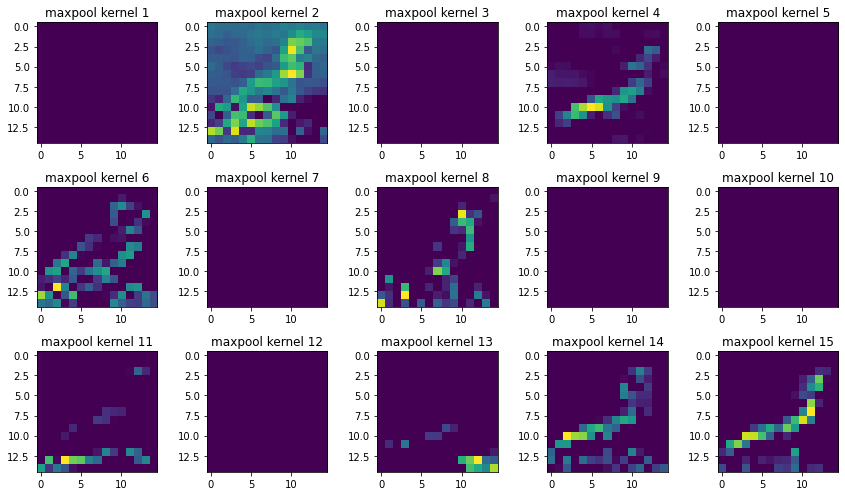

In [99]:
fig, axs = plt.subplots(3,5, figsize=(12,7))

k = 0
for i in range(3):
    for j in range(5):
        axs[i][j].imshow(maxpool_out[:,:,k])
        axs[i][j].set_title('maxpool kernel {}'.format(k+1))
        k += 1
plt.tight_layout()